In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Flatten, MaxPooling2D, Dropout, Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import tensorflow as tf
import os

In [2]:
base_dir= 'C:/Users/shash/Downloads/Bepec/Datasets/flowers-20240521T162319Z-001/flowers/'

img_size=224
batch=64

In [3]:
train_datagen= ImageDataGenerator(rescale=1./255, shear_range=0.2,
                                 zoom_range=0.2, horizontal_flip=True,
                                 validation_split=0.2)

test_datagen= ImageDataGenerator(rescale=1./255,
                                validation_split=0.2)

train_datagen=train_datagen.flow_from_directory(base_dir,
                                                   target_size=(
                                                       img_size, img_size),
                                                   subset='training',
                                                   batch_size=batch)

test_datagen=test_datagen.flow_from_directory(base_dir,
                                                 target_size=(
                                                     img_size, img_size),
                                                 subset='validation',
                                             batch_size=batch)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [4]:
model=Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5),padding='same',
                activation='relu', input_shape=(224, 224, 3)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3),
                padding='same',
                activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same',
               activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(2,2), padding='same', 
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(5, activation="softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
epochs=30
model.fit(train_datagen, epochs=epochs, validation_data=test_datagen)

Epoch 1/30


55/55 [==============================] - 203s 4s/step - loss: 1.3070 - accuracy: 0.4394 - val_loss: 1.1514 - val_accuracy: 0.5395
Epoch 2/30
55/55 [==============================] - 148s 3s/step - loss: 1.0763 - accuracy: 0.5670 - val_loss: 1.0837 - val_accuracy: 0.5849
Epoch 3/30
55/55 [==============================] - 139s 3s/step - loss: 1.0394 - accuracy: 0.5765 - val_loss: 0.9986 - val_accuracy: 0.6081
Epoch 4/30
55/55 [==============================] - 149s 3s/step - loss: 0.9125 - accuracy: 0.6482 - val_loss: 0.9369 - val_accuracy: 0.6267
Epoch 5/30
55/55 [==============================] - 145s 3s/step - loss: 0.8605 - accuracy: 0.6682 - val_loss: 0.8502 - val_accuracy: 0.6640
Epoch 6/30
55/55 [==============================] - 128s 2s/step - loss: 0.8185 - accuracy: 0.6789 - val_loss: 0.9132 - val_accuracy: 0.6384
Epoch 7/30
55/55 [==============================] - 122s 2s/step - loss: 0.7676 - accuracy: 0.7035 - val_loss: 0.8710 - val_accuracy: 0.6965
Epoch 8/30


In [11]:
from tensorflow.keras.models import load_model
model.save('Flower_Model.h5')

C:\Users\shash\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
savedModel=load_model('Flower_model.h5')

In [13]:
train_datagen.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

1/1 [==============================] - 0s 245ms/step
[[6.6135864e-05 7.6338004e-08 9.9851805e-01 2.3212912e-12 1.4156908e-03]]
Rose


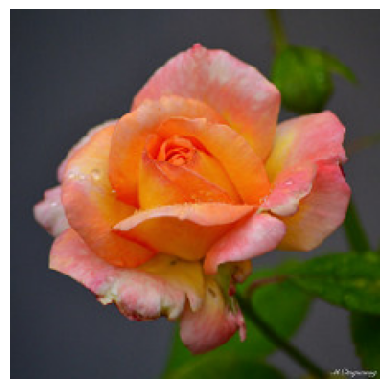

In [20]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load your trained model
savedModel = load_model('Flower_Model.h5')

# List of class names
class_names = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']

# Load and preprocess the image
image_path = r'C:\Users\shash\Downloads\Bepec\Datasets\flowers-20240521T162319Z-001\flowers\rose\20825078671_90b0389c70_m.jpg'
test_image = image.load_img(image_path, target_size=(224, 224))

# Display the image
plt.imshow(test_image)
plt.axis('off')  # Turn off axis labels

# Preprocess the image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension
test_image = test_image / 255.0  # Normalize the image

# Make prediction
result = savedModel.predict(test_image)
print(result)

# Find the index of the class with the highest probability
predicted_class_index = np.argmax(result, axis=1)[0]

# Print the predicted class
print(class_names[predicted_class_index])
